In [1]:
import pandas as pd
from matplotlib import pyplot as plt

## Matplotlib Glossary

![matplotlib glossary](./fig-anatomy.png)

In [2]:
sales_joined = pd.read_parquet("./data/m5-forecasting-accuracy/sales-joined.parq.brotli")
# if your system has less RAM, the alternate download is just one year of data
# sales_joined = pd.read_parquet("./data/m5-forecasting-accuracy/sales-joined-2015.parq.brotli")

In [3]:
# fyi resource usage
mem_gb = sales_joined.memory_usage().sum() / 1024 ** 3
print(f"{len(sales_joined) / 1e6:.1f} million rows using {mem_gb:.2f} GB of RAM")

59.2 million rows using 6.17 GB of RAM


## Bar Charts

In [4]:
total_sales_by_store = sales_joined.groupby("store_id")["count"].sum()
total_sales_by_store

store_id
CA_1     7832248
CA_2     5818395
CA_3    11363540
CA_4     4182534
TX_1     5692823
TX_2     7329642
TX_3     6205940
WI_1     5261506
WI_2     6697988
WI_3     6542557
Name: count, dtype: int64

<AxesSubplot:xlabel='store_id'>

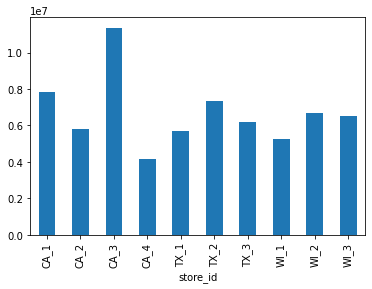

In [5]:
# the minimum needed to make a plot
total_sales_by_store.plot(kind="bar")

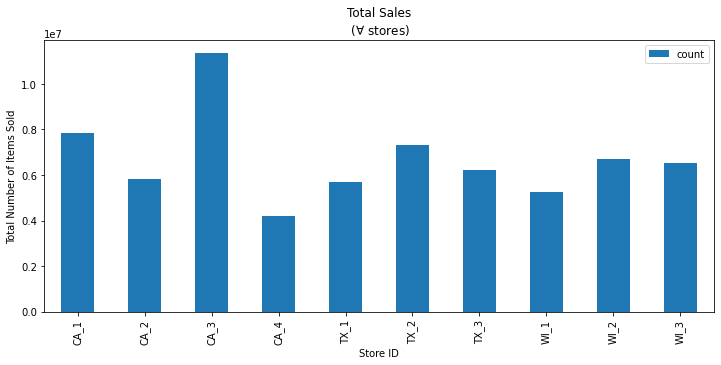

In [6]:
total_sales_by_store.plot(
    kind="bar", # we want to plot a bar chart
    title="Total Sales\n ($\\forall$ stores)", # we want to add a title (newlines and LaTeX supported)
    figsize=(12, 5), # we can set the size / dimensions here
    ylabel="Total Number of Items Sold", # label the Y axis
    xlabel="Store ID", # label the X axis
    legend=True, # include a legend
); # a trailing semicolon suppresses the <AxesSubplot:...> output

FOODS        1437
HOUSEHOLD    1047
HOBBIES       565
Name: cat_id, dtype: int64

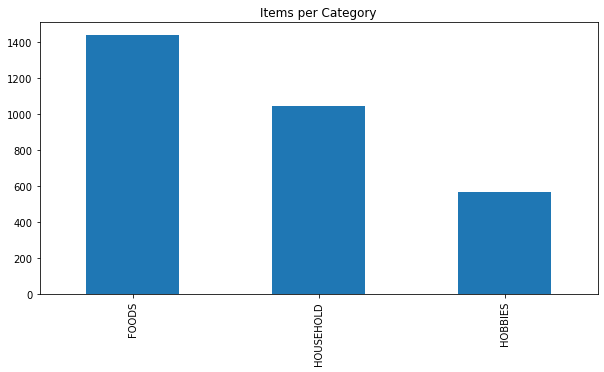

In [7]:
# note: bar charts are great for plotting frequency too
item_info = sales_joined[["item_id", "dept_id", "cat_id"]].drop_duplicates()
category_counts = item_info["cat_id"].value_counts()
category_counts.plot(kind="bar", title="Items per Category", figsize=(10, 5))
category_counts

## Histograms

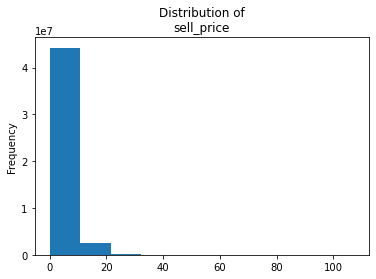

In [8]:
# simple histogram call
sales_joined["sell_price"].plot(kind="hist", title="Distribution of\nsell_price");

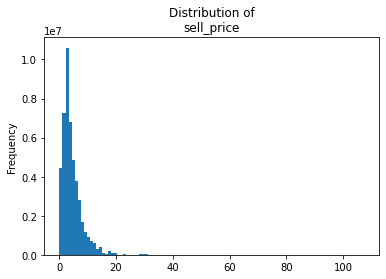

In [9]:
# increase the number of bins for a more fine-grained plot
sales_joined["sell_price"].plot(kind="hist", title="Distribution of\nsell_price", bins=100);

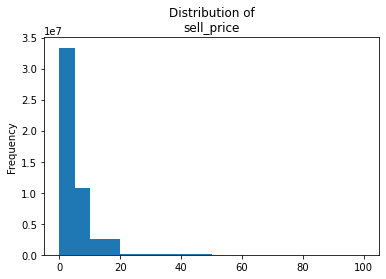

In [10]:
# or define custom bins
sales_joined["sell_price"].plot(kind="hist", title="Distribution of\nsell_price", bins=[0, 5, 10, 20, 50, 100]);

## Scatterplots

In [20]:
sales_by_store_by_month = sales_joined.groupby(["store_id", "month"])["count"].sum().reset_index()
sales_by_store_by_month["month_date"] = pd.to_datetime(sales_by_store_by_month["month"].astype(str), format="%Y%m")
sales_by_store_by_month.drop(columns=["month"], inplace=True)
sales_by_store_by_month["month_prev"] = sales_by_store_by_month["month_date"] - pd.DateOffset(months=1)
sales_by_store_by_month = pd.merge(
    sales_by_store_by_month, sales_by_store_by_month,
    left_on=["store_id", "month_prev"], right_on=["store_id", "month_date"], suffixes=('', '_prev'),
)

,store_id,count,month_date,month_prev,count_prev,month_date_prev,month_prev_prev
0,CA_1,89434,2011-02-01,2011-01-01,11308,2011-01-01,2010-12-01
1,CA_1,93468,2011-03-01,2011-02-01,89434,2011-02-01,2011-01-01
2,CA_1,91553,2011-04-01,2011-03-01,93468,2011-03-01,2011-02-01
3,CA_1,87988,2011-05-01,2011-04-01,91553,2011-04-01,2011-03-01
4,CA_1,90376,2011-06-01,2011-05-01,87988,2011-05-01,2011-04-01


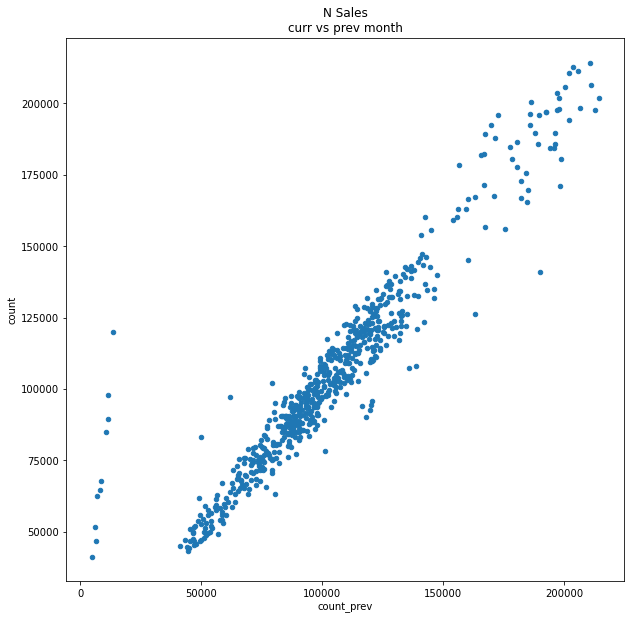

In [21]:
sales_by_store_by_month.plot(kind="scatter", x="count_prev", y="count", title="N Sales\ncurr vs prev month", figsize=(10, 10))
sales_by_store_by_month.head()

## Timeseries Plot

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
month_date,,,,,,,,,,
2011-02-01,89434,67686,119792,41189,62534,84900,64581,46592,51708,97959
2011-03-01,93468,73964,127344,44902,66890,89902,68370,49747,51113,97867
2011-04-01,91553,72803,122428,44220,66435,87683,66563,46898,47651,91479
2011-05-01,87988,68305,120711,44562,67920,86128,67572,45269,45487,85620
2011-06-01,90376,69380,129867,43325,69945,89914,75794,46776,50737,87266


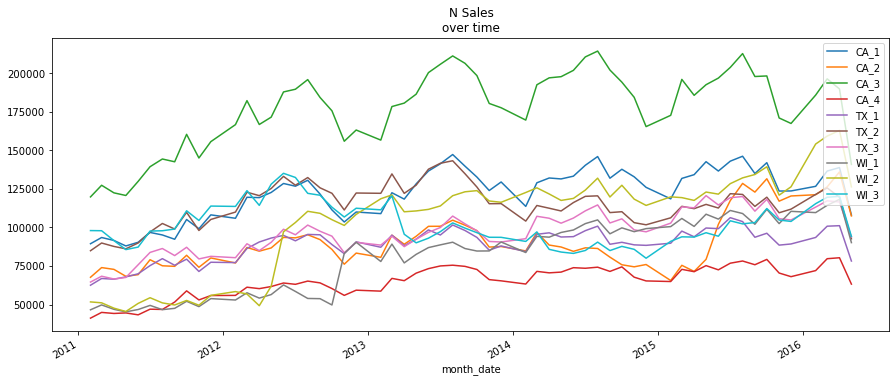

In [16]:
monthly_sales = sales_by_store_by_month.pivot(index="month_date", columns="store_id", values="count")
monthly_sales.plot(
    kind="line", figsize=(15, 6), title="N Sales\nover time").legend(loc="upper right")
monthly_sales.head()

## Multiple Plots

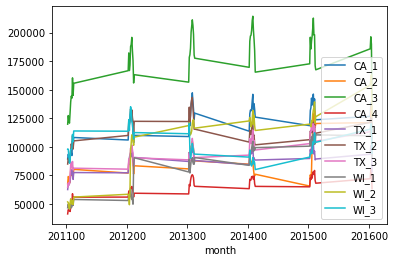

In [14]:
# By default, new data is continued on the same plot
for col in monthly_sales.columns:
    monthly_sales[col].plot()
plt.legend()

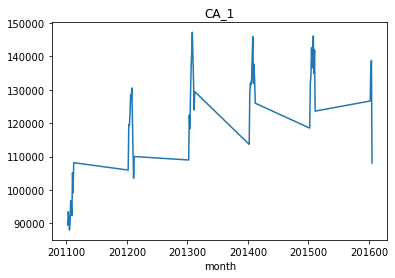

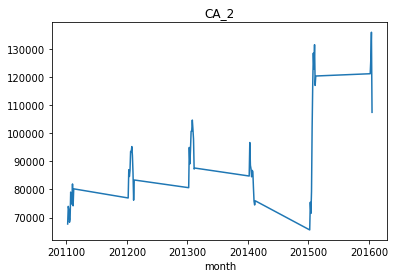

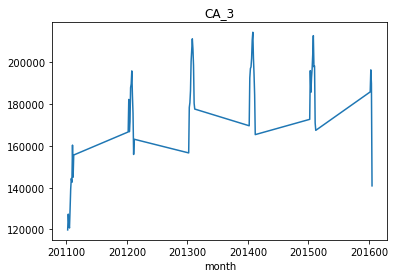

In [15]:
# To create new plots, call plt.figure()
from matplotlib import pyplot as plt

for col in monthly_sales.columns[:3]:
    plt.figure()
    monthly_sales[col].plot(title=col)

## See More
See the pandas visualization docs at https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html